In [1]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.9 MB/s eta 0:00:00


In [2]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
#DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
#ENCODING
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
#SCALING
from sklearn.preprocessing import StandardScaler
#Feature Selection:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
#ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xg

In [10]:
#Metrics and Validation:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [11]:
## loading the dataset...
cars=pd.read_csv("/content/car_price_prediction.csv")

In [12]:
cars.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [13]:
cars.shape

(19237, 18)

In [14]:
#metadata of our dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Data Cleaning:

In [15]:
#number of null values in our dataset
cars.isnull().sum(axis=0)

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [16]:
#dropping duplicates
ncars=cars.drop_duplicates(keep=False)

In [17]:
#shape of our new dataset
ncars.shape

(18704, 18)

In [18]:
ncars.head()

ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS    RX 450        2010       Jeep   
2  45774419   8467     -        HONDA       FIT        2006  Hatchback   
3  45769185   3607   862         FORD    Escape        2011       Jeep   
4  45809263  11726   446        HONDA       FIT        2014  Hatchback   
5  45802912  39493   891      HYUNDAI  Santa FE        2016       Jeep   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   
5              Yes    Diesel             2  160931 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4  
5     Automatic        Front  04-May        Left wheel   White        4

In [19]:
ncars.Levy.dtype

dtype('O')

In [20]:
#In Levy column,hyphens are replaced with zeroes
ncars.Levy=ncars.Levy.str.replace('-','0')

<ipython-input-20-9dd4d70e0e9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars.Levy=ncars.Levy.str.replace('-','0')


In [21]:
#obj->int
ncars.Levy=ncars.Levy.astype('int64')

<ipython-input-21-8292d5c8b603>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars.Levy=ncars.Levy.astype('int64')


In [22]:
ncars.Levy

0        1399
2           0
3         862
4         446
5         891
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18704, dtype: int64

In [23]:
#as Mileage is a factor, removing "km" from it helps in improvising the prediction
ncars.Mileage.head()

0    186005 km
2    200000 km
3    168966 km
4     91901 km
5    160931 km
Name: Mileage, dtype: object

In [24]:
#we have to drop the km 
ncars.Mileage=ncars.Mileage.apply(lambda x:str(x).replace("km"," "))
#converting into int
ncars.Mileage=ncars.Mileage.apply(lambda x:int(x))

<ipython-input-24-e7382366fe4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars.Mileage=ncars.Mileage.apply(lambda x:str(x).replace("km"," "))
<ipython-input-24-e7382366fe4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars.Mileage=ncars.Mileage.apply(lambda x:int(x))


In [25]:
ncars.Mileage

0        186005
2        200000
3        168966
4         91901
5        160931
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18704, dtype: int64

In [26]:
#Doors have mixed datatype with both strings and integers
ncars.Doors.head()

0    04-May
2    04-May
3    04-May
4    04-May
5    04-May
Name: Doors, dtype: object

In [27]:
ncars.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [28]:
#converting the Doors field in more readable form
ncars.Doors=ncars.Doors.str.replace('04-May','4-5').replace('02-Mar','2-3')


<ipython-input-28-397cb21b70ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars.Doors=ncars.Doors.str.replace('04-May','4-5').replace('02-Mar','2-3')


In [29]:
ncars.Doors.unique()

array(['4-5', '2-3', '>5'], dtype=object)

In [30]:
ncars['Engine volume']

0              3.5
2              1.3
3              2.5
4              1.3
5                2
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 18704, dtype: object

In [31]:
#removing "Turbo" from this field
ncars['Engine volume']=ncars['Engine volume'].str.replace(r'([a-z,' ',A-Z])','').astype('f')

<ipython-input-31-6931dc41230f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ncars['Engine volume']=ncars['Engine volume'].str.replace(r'([a-z,' ',A-Z])','').astype('f')
<ipython-input-31-6931dc41230f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars['Engine volume']=ncars['Engine volume'].str.replace(r'([a-z,' ',A-Z])','').astype('f')


In [32]:
ncars['Engine volume']

0        3.5
2        1.3
3        2.5
4        1.3
5        2.0
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18704, dtype: float32

In [33]:
#making the following fields object data type. Why? Because, it doesn't much predict the price of the car imo
ncars.Airbags=ncars.Airbags.astype('O')

<ipython-input-33-5bc6e23bdd3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars.Airbags=ncars.Airbags.astype('O')


In [34]:
ncars['Cylinders']=ncars['Cylinders'].astype('O')

<ipython-input-34-547bb0697abd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars['Cylinders']=ncars['Cylinders'].astype('O')


In [35]:
ncars['Prod. year']=ncars['Prod. year'].astype('O')

<ipython-input-35-c8baddb7bb6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncars['Prod. year']=ncars['Prod. year'].astype('O')


In [36]:
ncars.describe()

ID         Price          Levy  Engine volume       Mileage
count  1.870400e+04  1.870400e+04  18704.000000   18704.000000  1.870400e+04
mean   4.557522e+07  1.860236e+04    632.444985       2.305742  1.572059e+06
std    9.363561e+05  1.932520e+05    569.018150       0.877472  4.908815e+07
min    2.074688e+07  1.000000e+00      0.000000       0.000000  0.000000e+00
25%    4.569182e+07  5.331000e+03      0.000000       1.800000  7.030300e+04
50%    4.577164e+07  1.317200e+04    642.000000       2.000000  1.266900e+05
75%    4.580162e+07  2.200000e+04    915.000000       2.500000  1.895300e+05
max    4.581665e+07  2.630750e+07  11714.000000      20.000000  2.147484e+09

In [37]:
ncars.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [40]:
cat_col = list(cars.select_dtypes('O').columns)
num_col = list(cars.select_dtypes(np.number).columns)

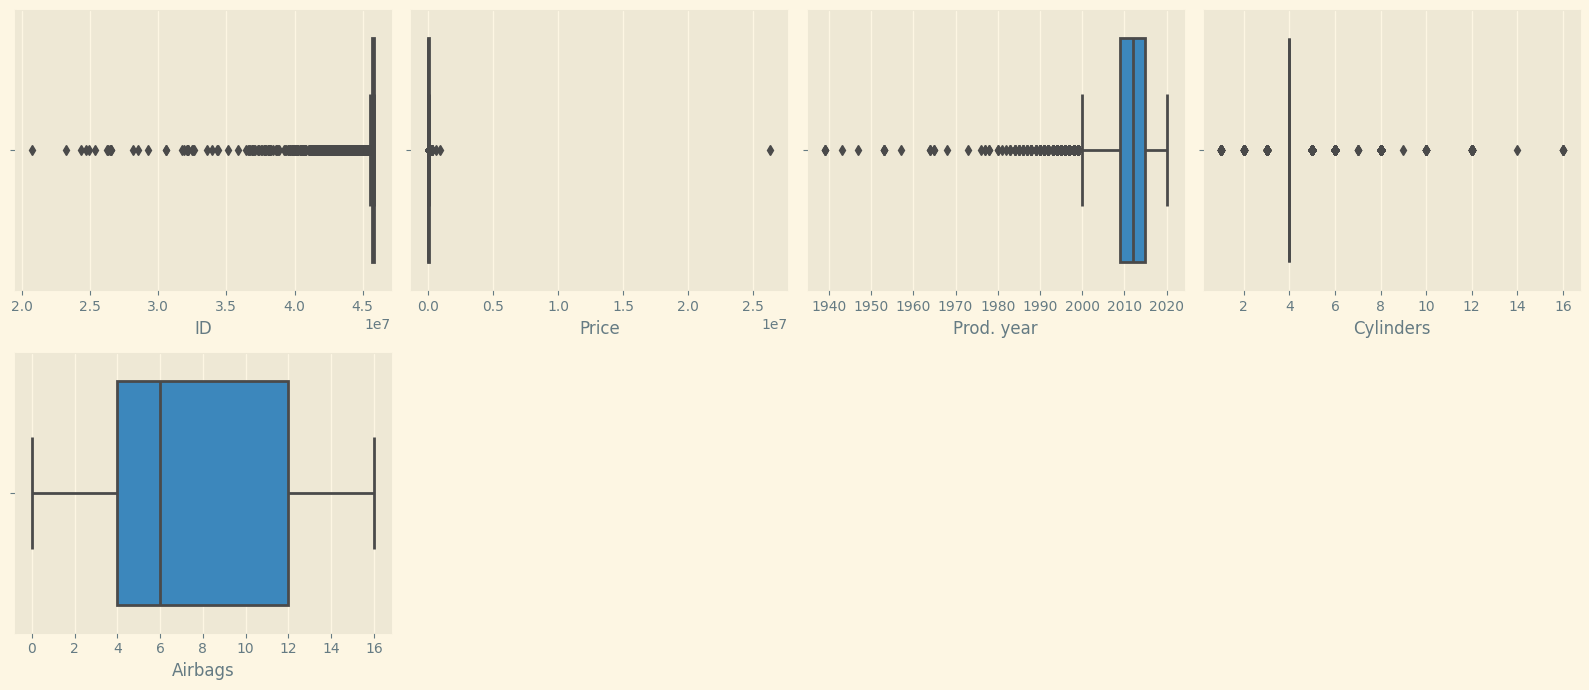

In [41]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=[16,7])
for i,j in enumerate(num_col):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=ncars[j])
    plt.tight_layout()
plt.show()

In [42]:
ccars=ncars.copy()

In [43]:
q1=ccars.quantile(0.25)
q3=ccars.quantile(0.75)
iqr=q3-q1

<ipython-input-43-2a5a3f886691>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=ccars.quantile(0.25)
<ipython-input-43-2a5a3f886691>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=ccars.quantile(0.75)


In [44]:
ccars = ccars[~(((ccars>q3+3*iqr) | (ccars<q1-3*iqr)).any(axis=1))]

<ipython-input-44-5e89f687ae0a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ccars = ccars[~(((ccars>q3+3*iqr) | (ccars<q1-3*iqr)).any(axis=1))]


In [45]:
len(ccars)

16189

In [46]:
len(ncars)

18704

In [47]:
cat_col = list(ccars.select_dtypes('O').columns)
num_col = list(ccars.select_dtypes(np.number).columns)

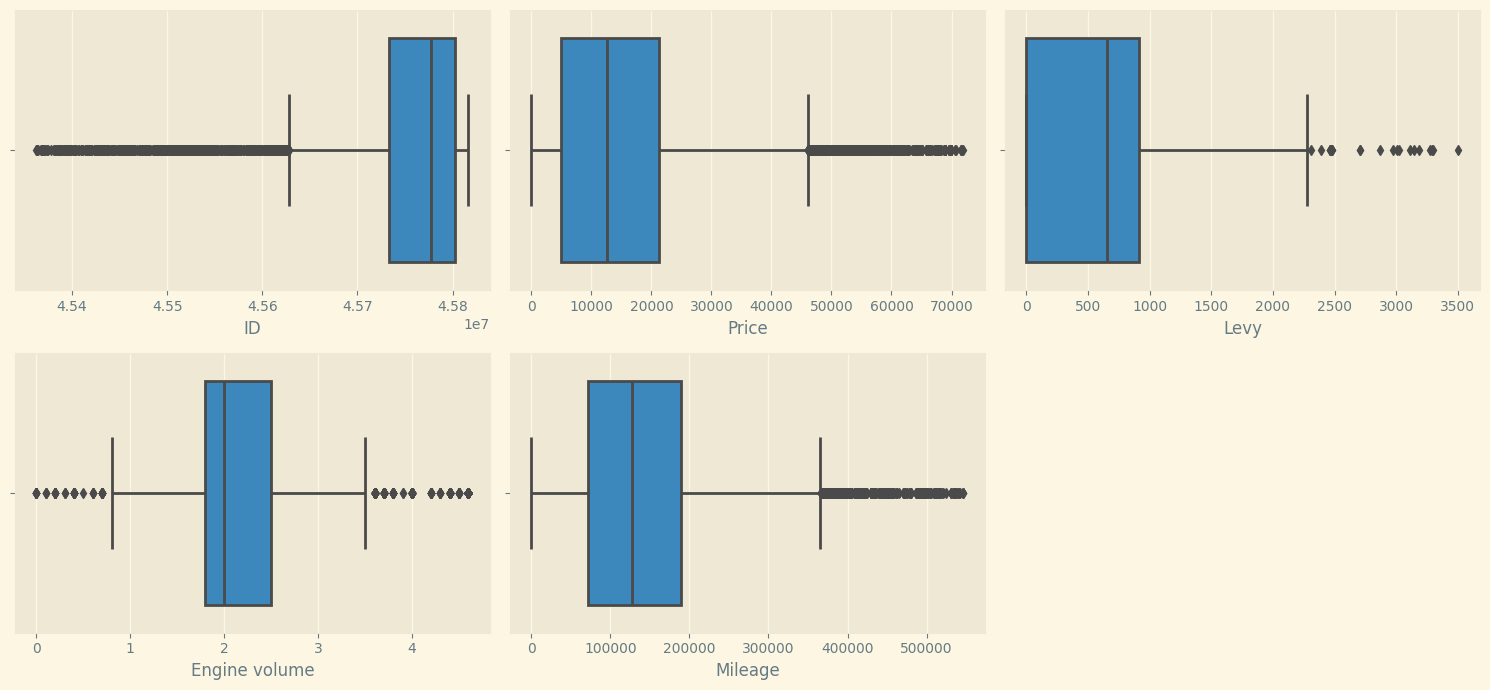

In [48]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=[15,7])
for i,j in enumerate(num_col):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=ccars[j])
    plt.tight_layout()
plt.show()

In [49]:
#Does ID is necessary for us to predict the price? No! So we are free to drop it from numerical columns
num_col.remove('ID')
ccars.drop(columns='ID',inplace=True)

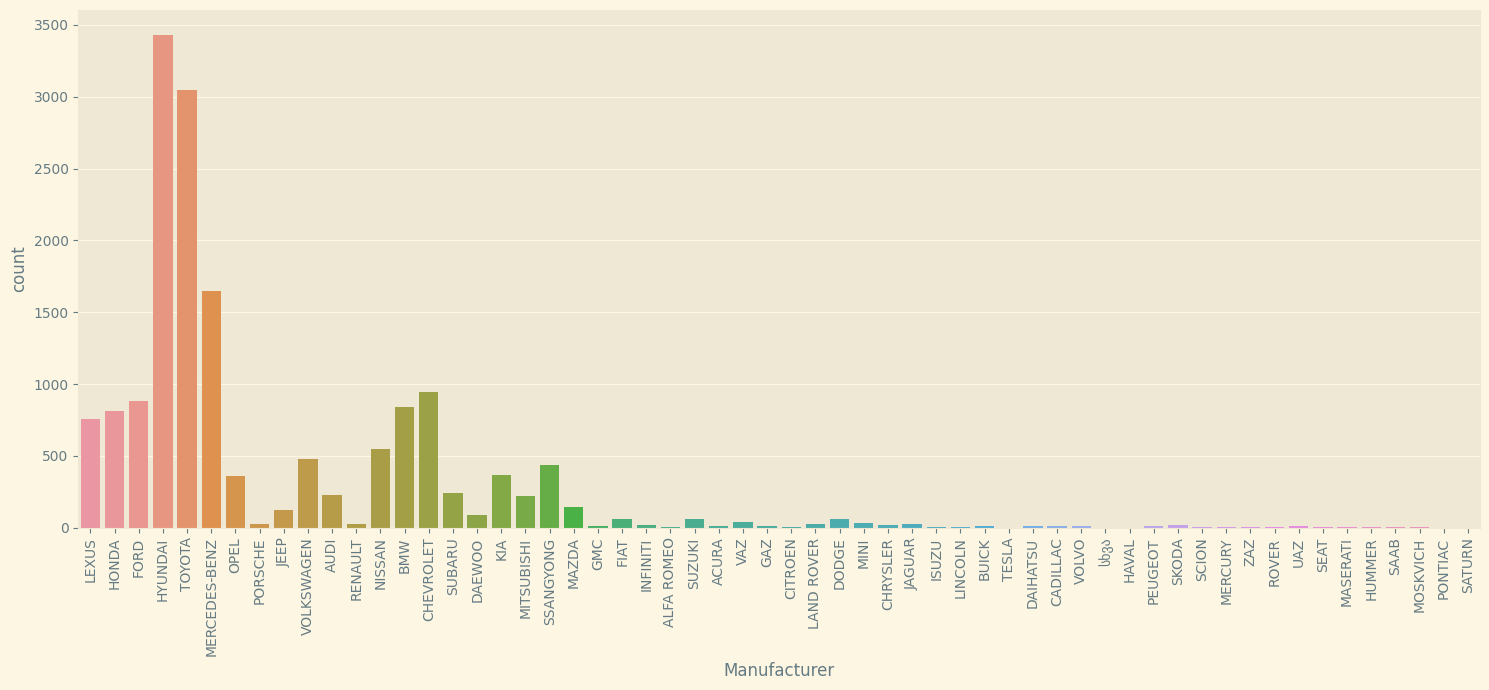

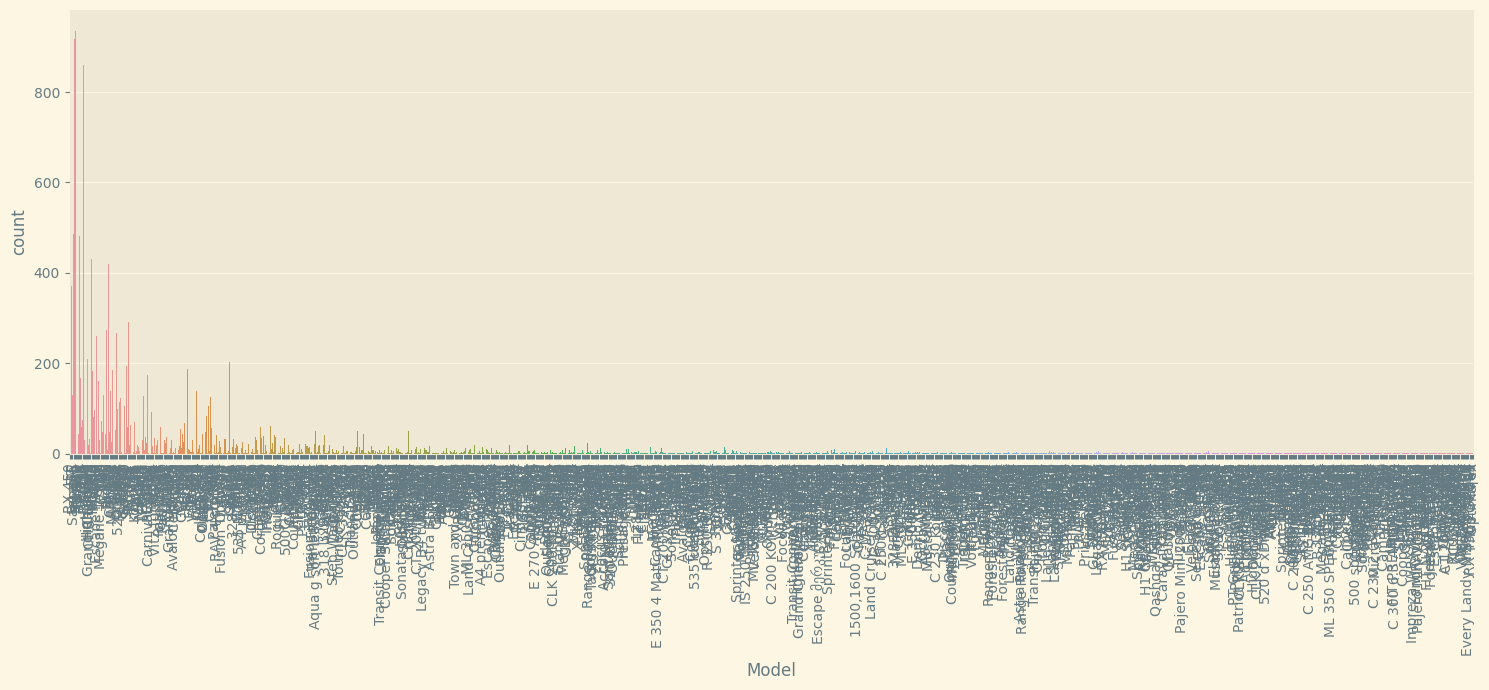

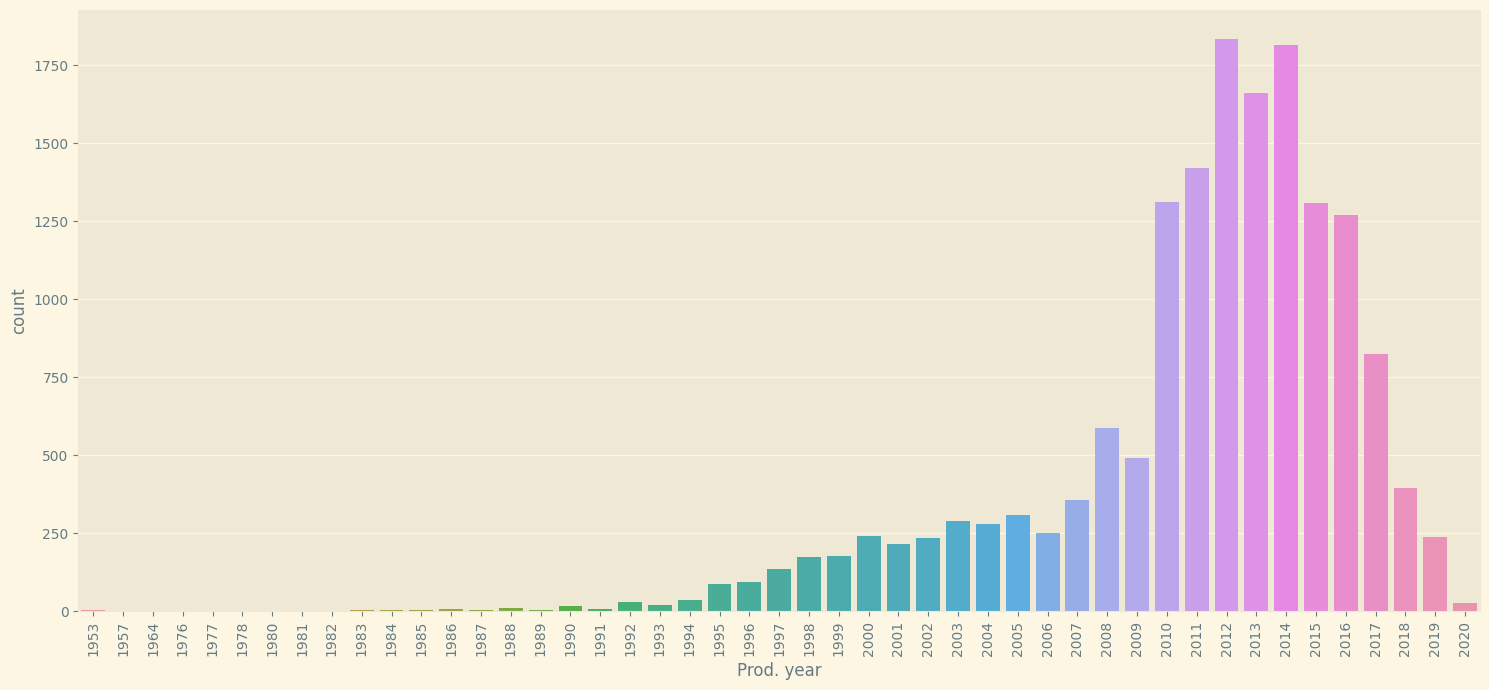

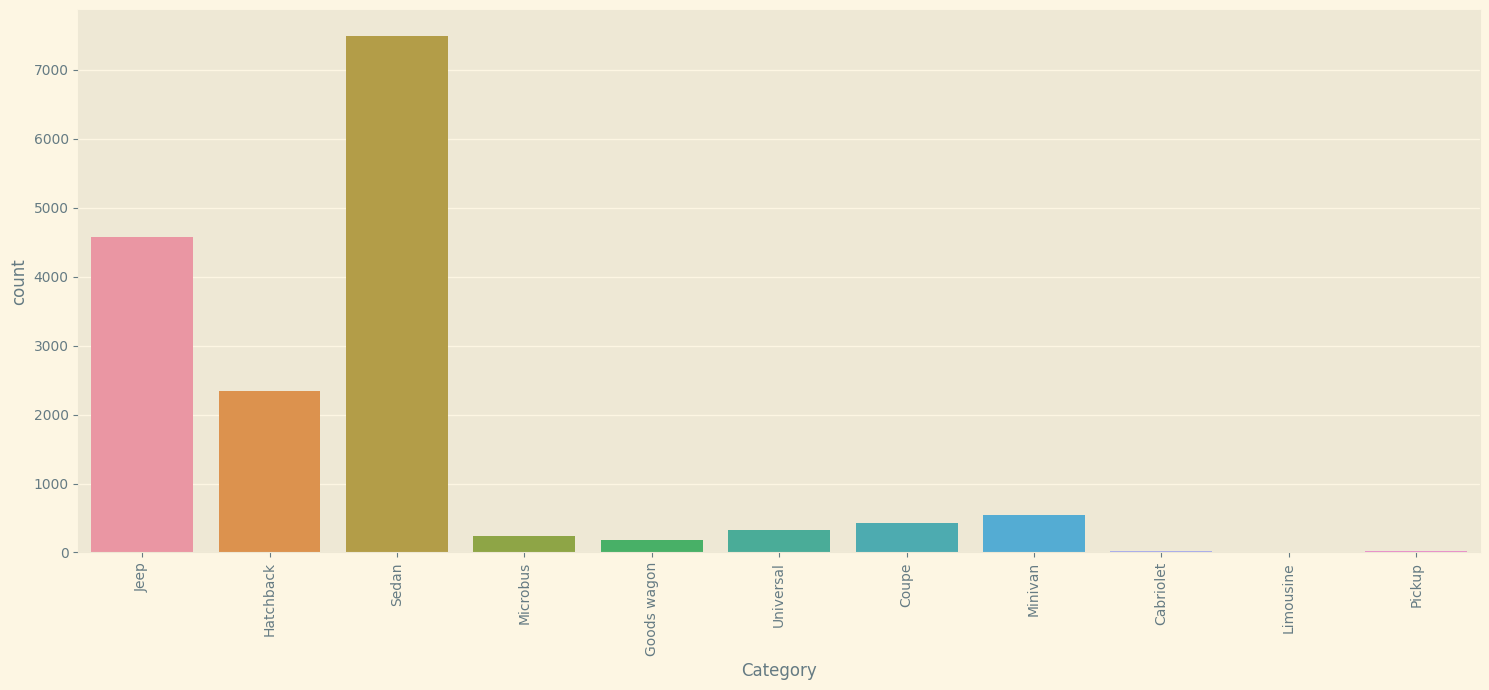

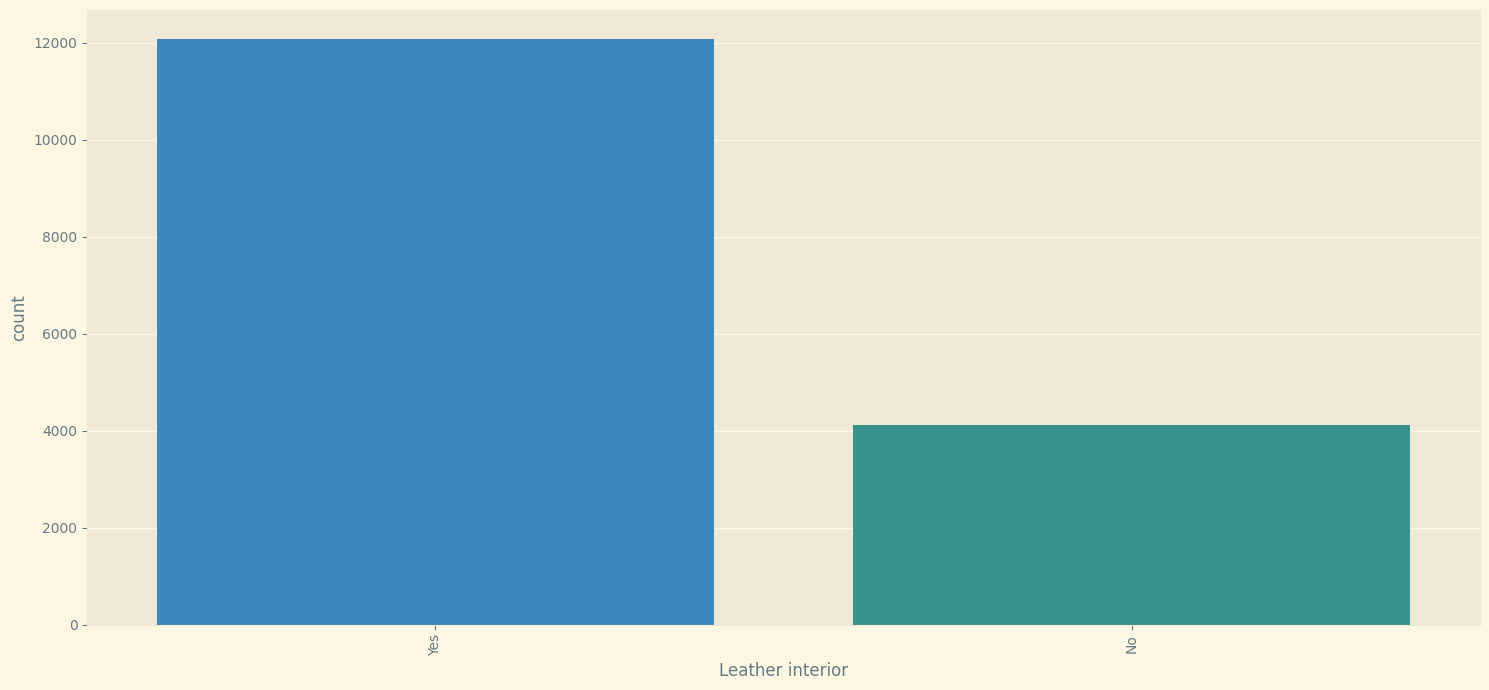

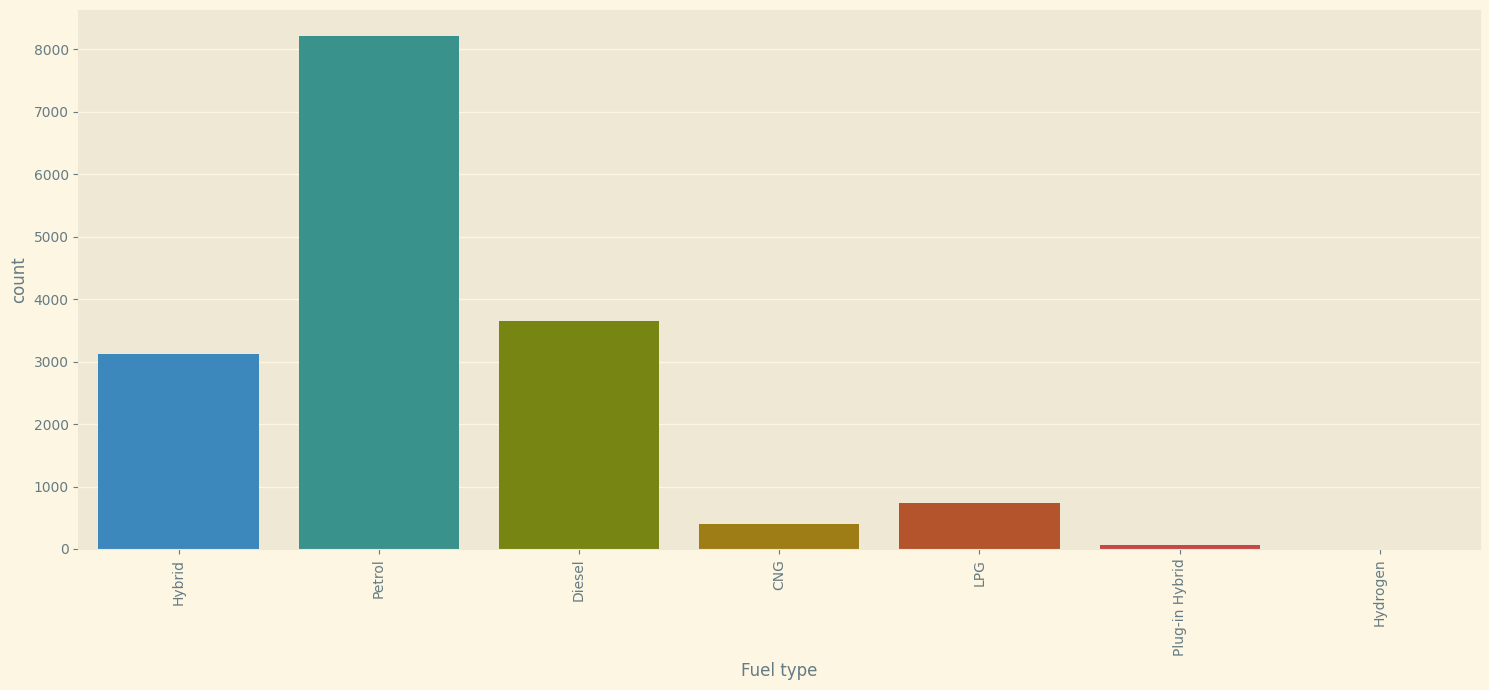

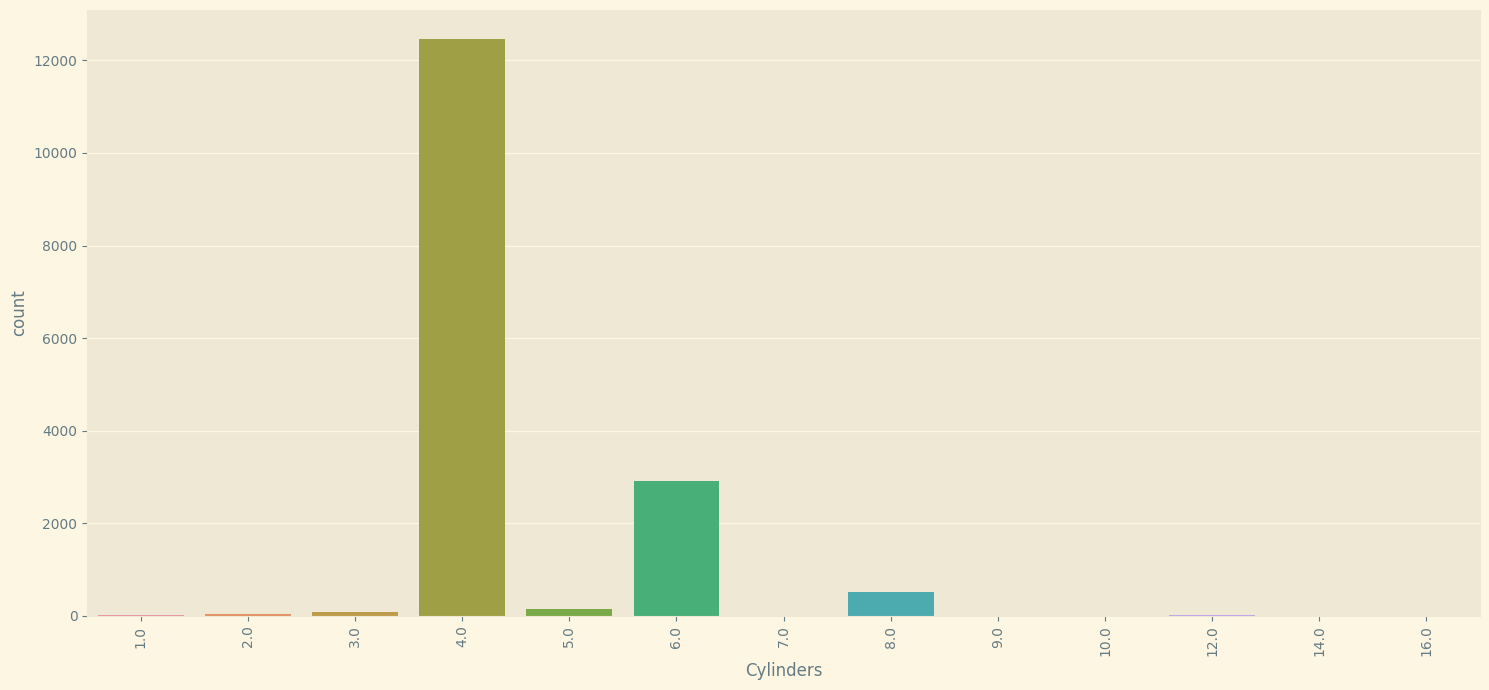

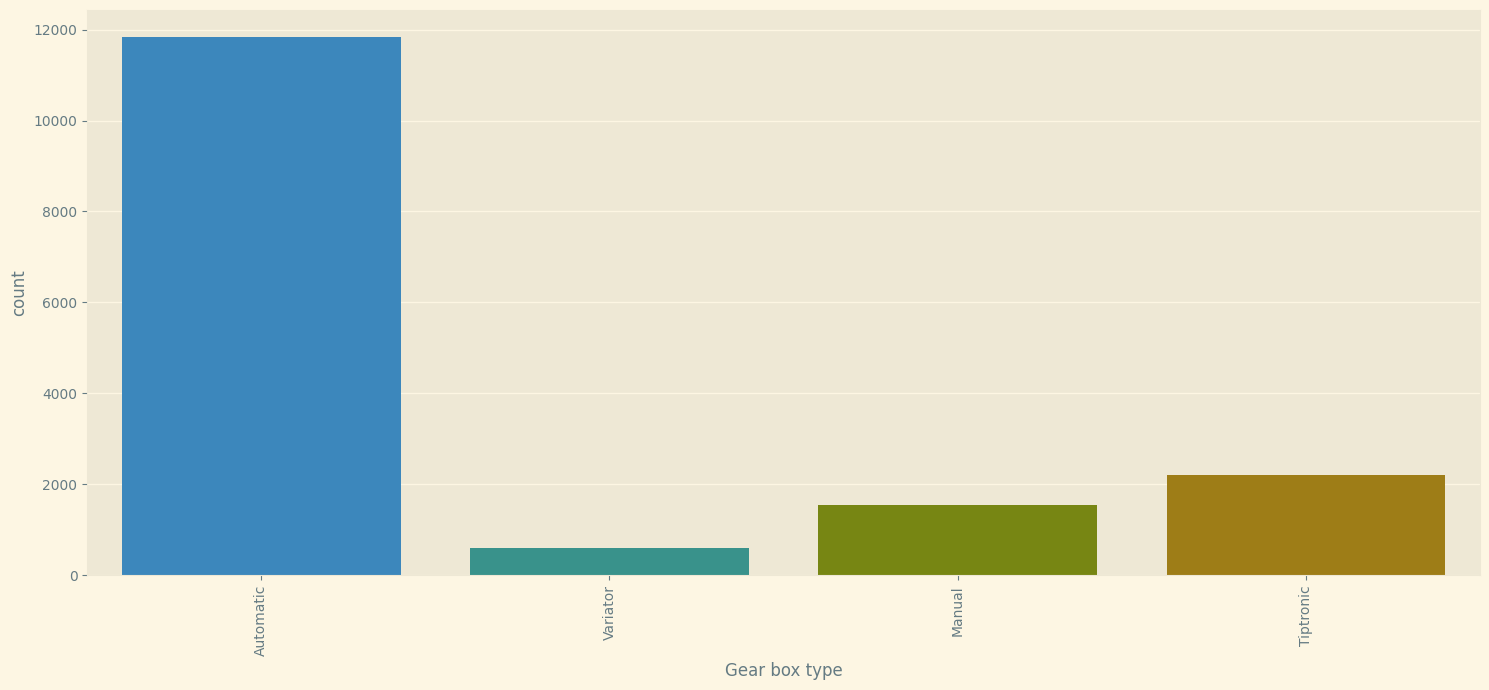

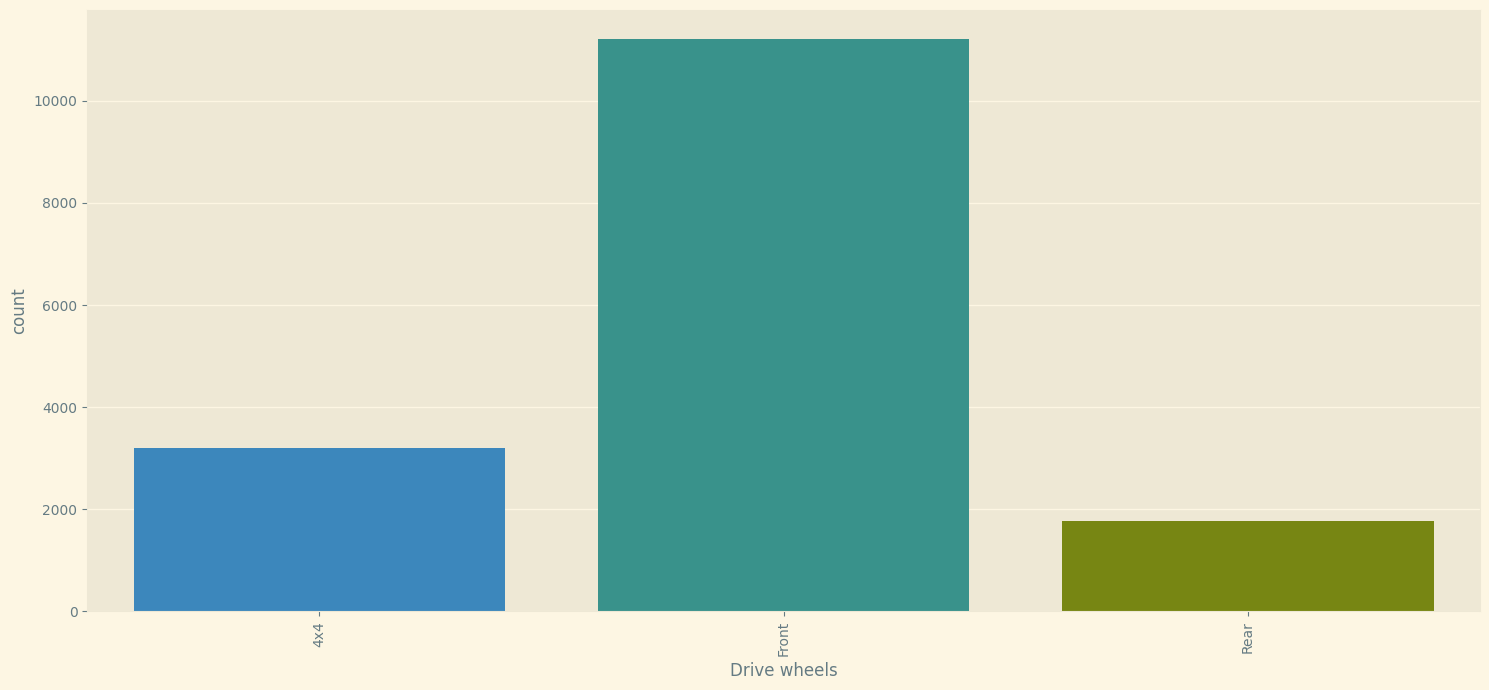

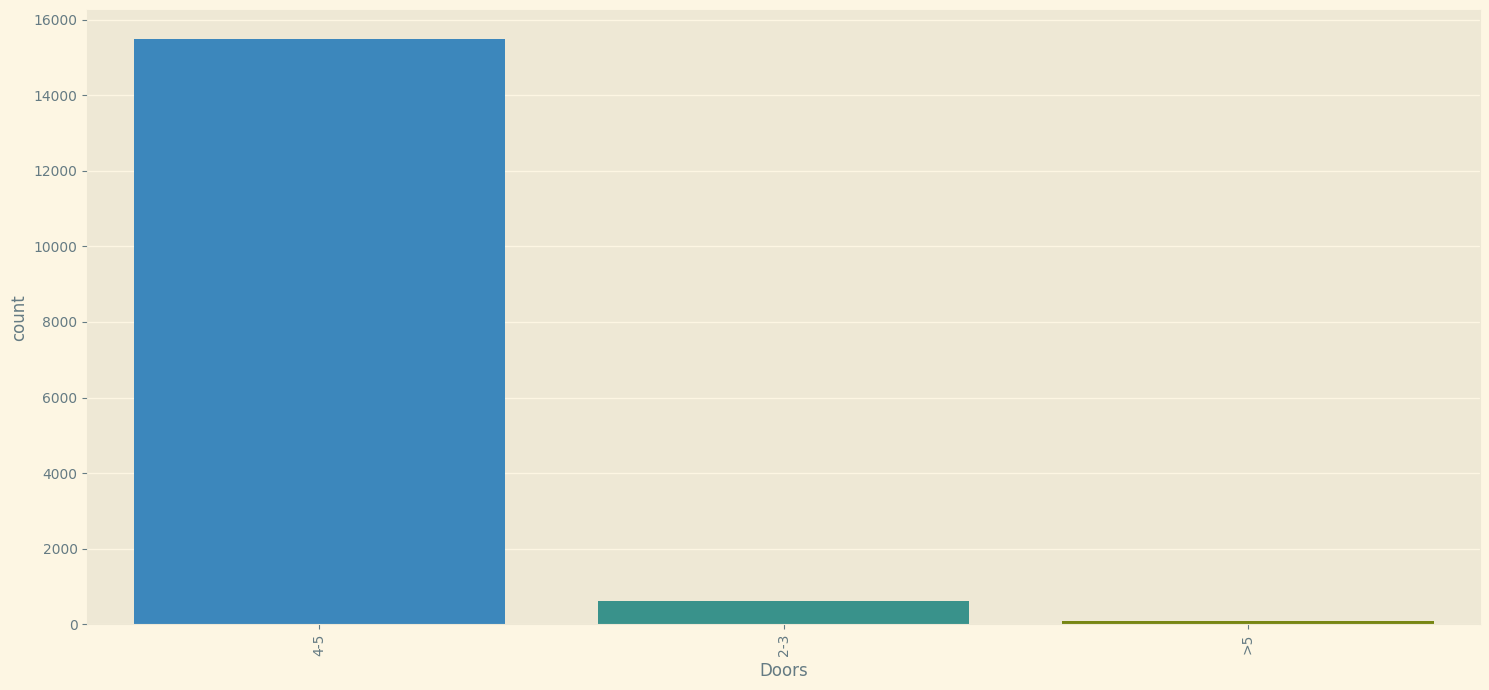

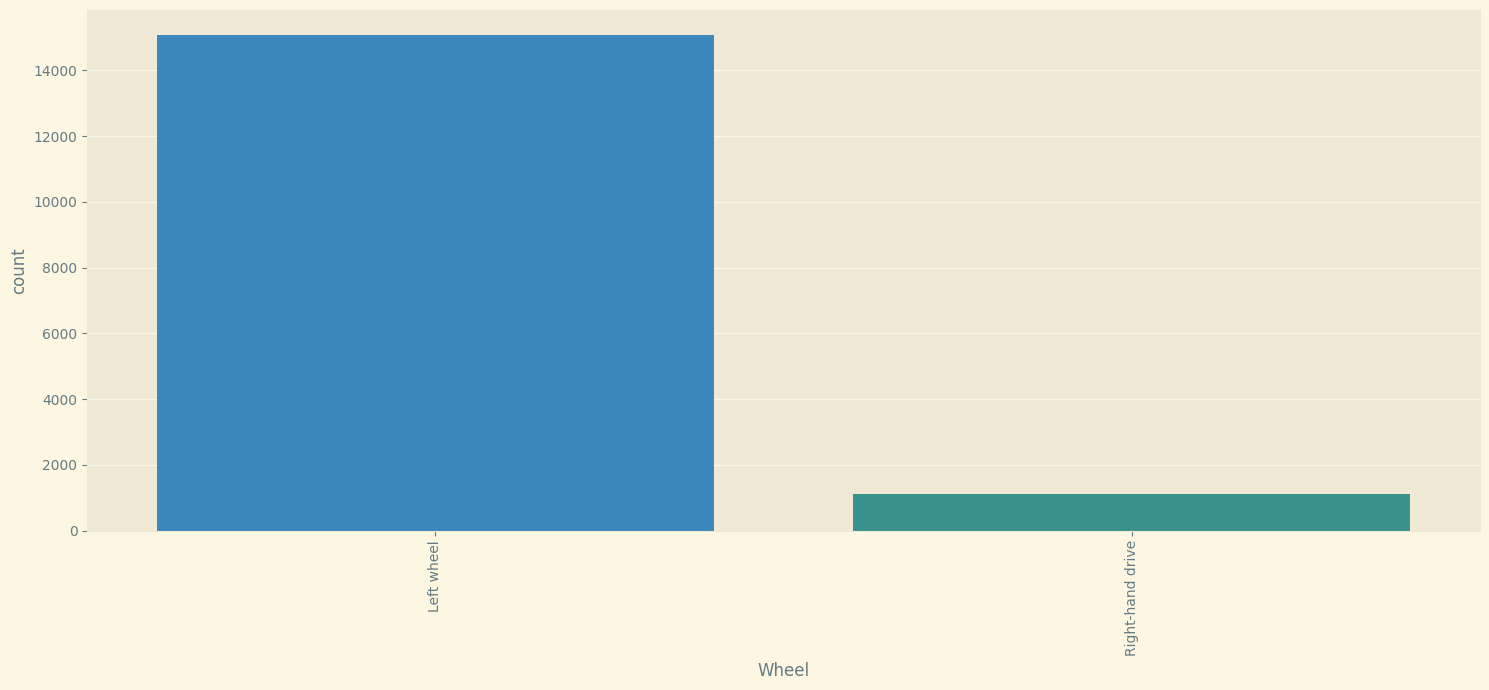

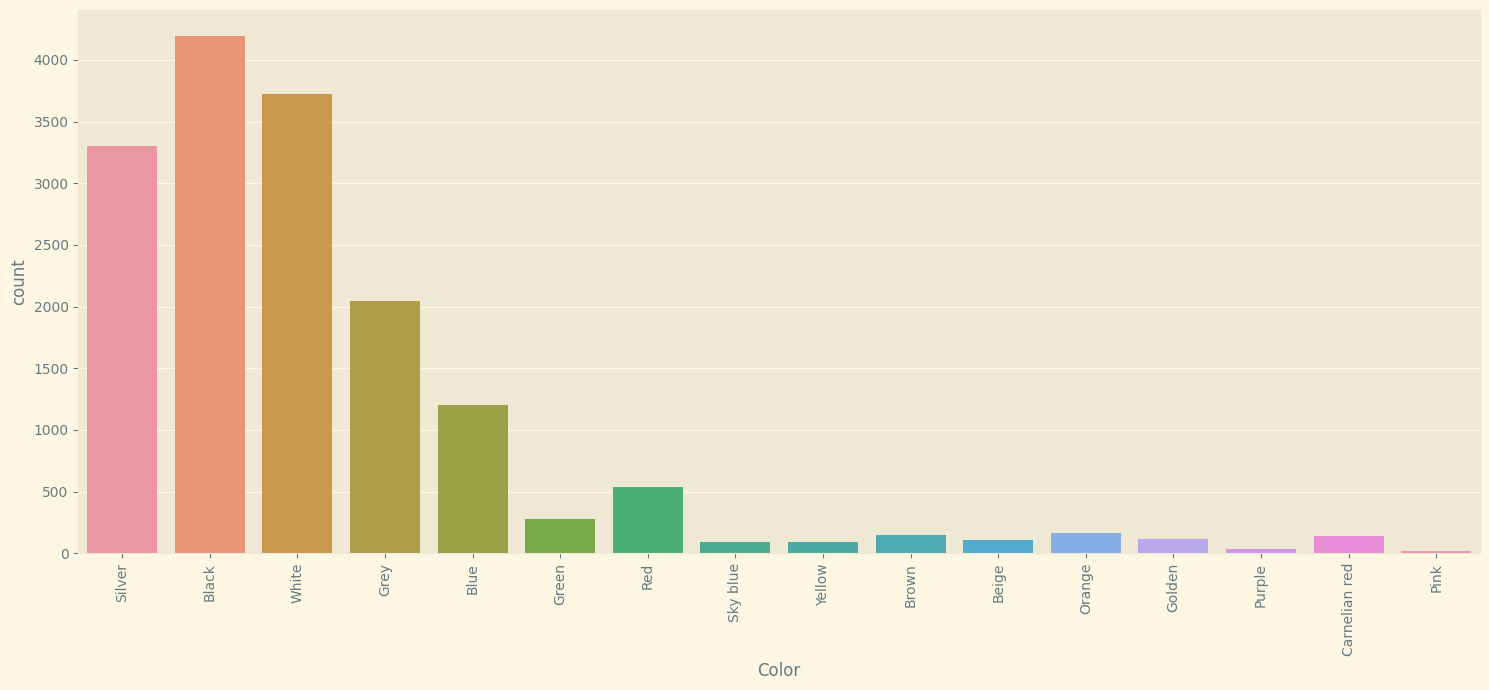

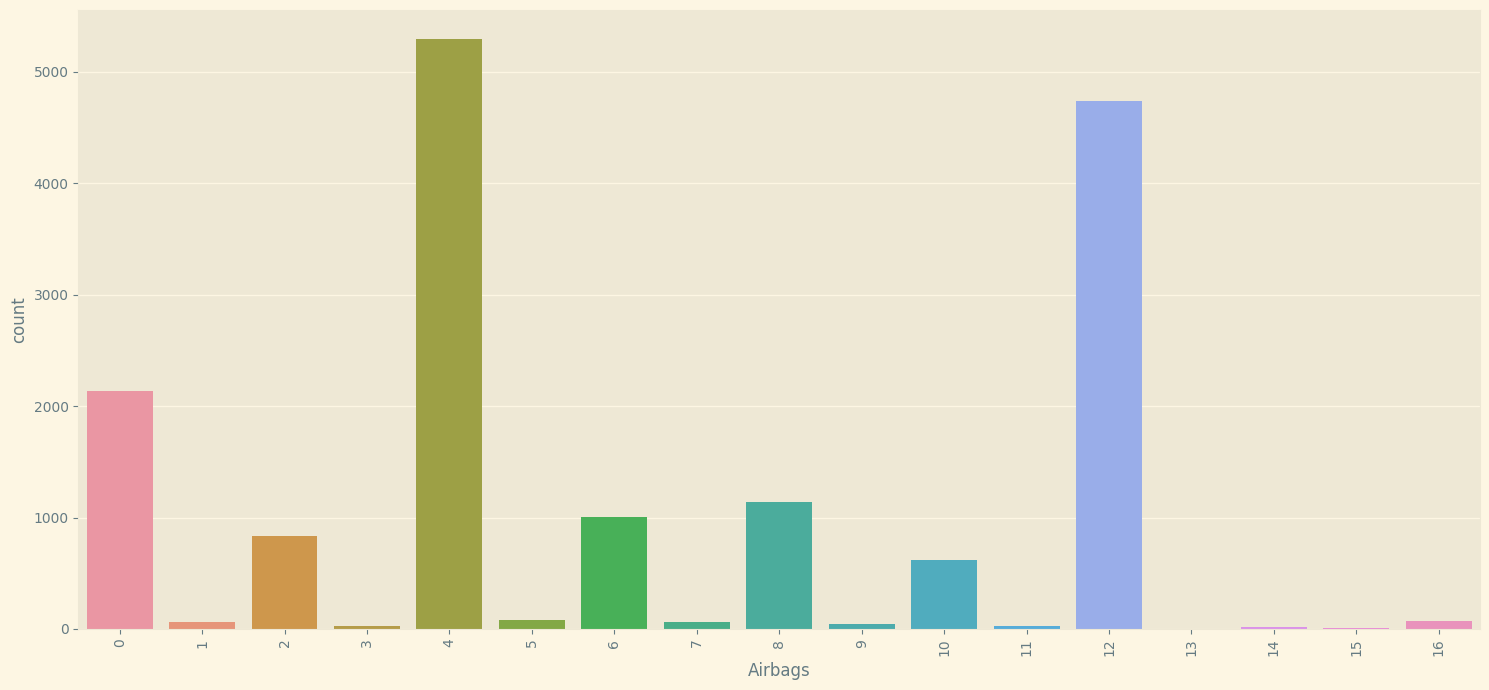

In [53]:
%matplotlib inline
for i in cat_col:
        plt.figure(figsize=[15,7])
        sns.countplot(x=ccars[i])
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show() 


In [54]:
#To get an overview of which Category are preferred by each manufacturer
fig = px.treemap(data_frame=ccars,path=["Manufacturer","Category","Model"],title='MANUFACTURER WISE DATA DISTRIBUTION')
fig.show()

In [55]:
fig = px.treemap(data_frame=ccars,path=["Manufacturer","Category","Model"],values='Price',title='MANUFACTURER WISE TOTAL PRICE | SALES DISTRIBUTION')
fig.show()

Insights:
Brandwise Hyundai is the leading brand followed by Toyota and Mercedes Benz
Among cars, Jeep and Sedan type cars are most preferred by customers
Most customers wish to have leather interior for their cars
Cars with four cylinders is favourable by the customers 
Most preferred fuel type:Petrol
Cars with left wheel are in higher demand
Most preferred drive wheel:front
Most preferred Gear type:Automatic
Most preferred Color:Silver,White,Grey,Black

<ipython-input-56-2cb088de7d91>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



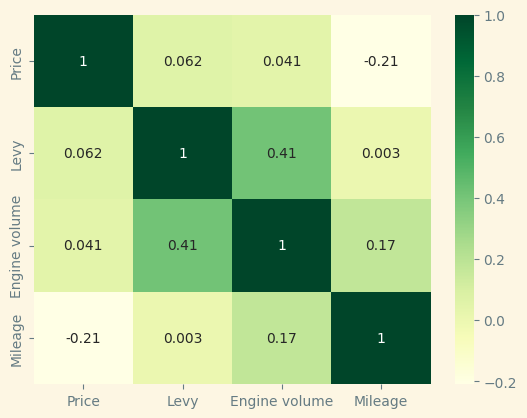

In [56]:
sns.heatmap(data=ccars.corr(),cmap='YlGn',annot=True)
plt.show()

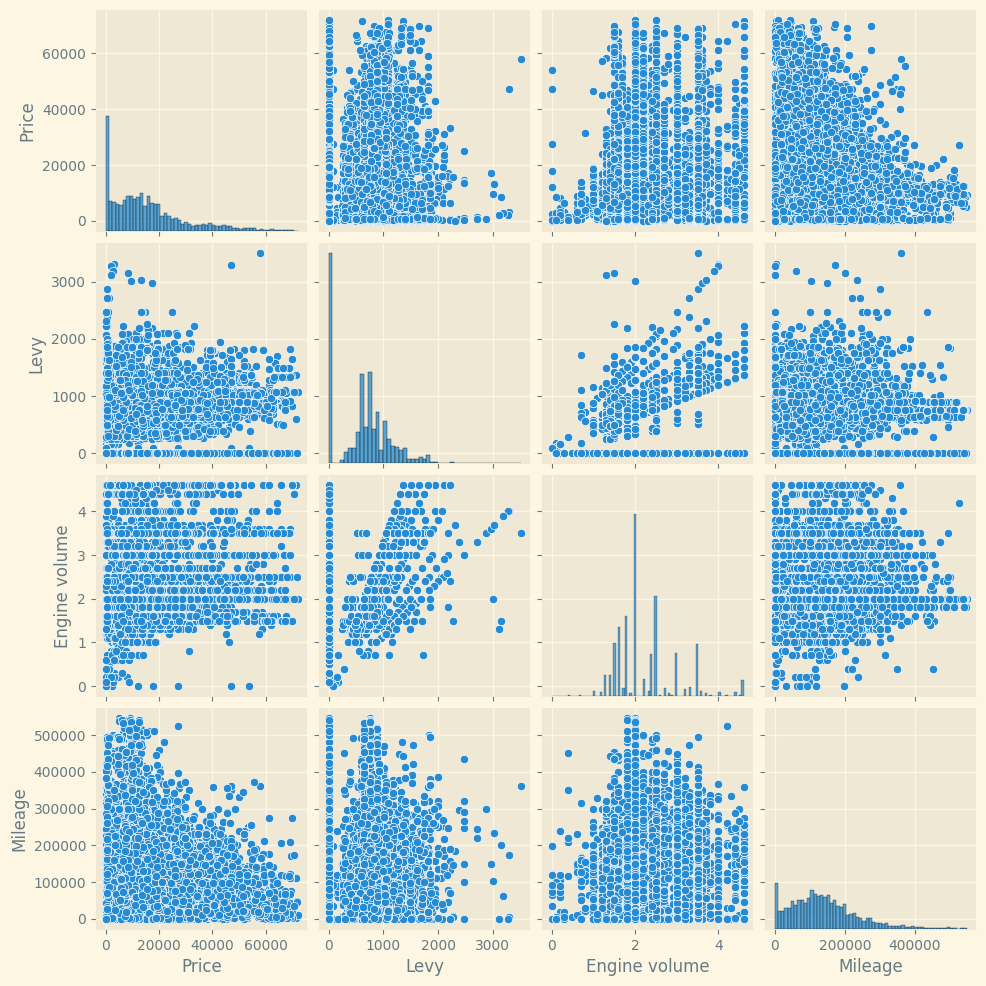

In [57]:
sns.pairplot(ccars[num_col])
plt.show()

In [58]:
for i in cat_col:
    if len(cars[i].unique())<25:
        boxp = px.box(data_frame=ccars,x=i,y='Price')
        boxp.show()

In [59]:
len(cars.Model.unique())

1590

In [60]:
#Train-Test-Split
X=ccars.copy()
X.drop(columns='Price',inplace=True)
y=ccars['Price']

In [61]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [62]:
#Making production years are unique categorical values
yrs = list(X['Prod. year'].sort_values().unique())
mapuni = {j:i for i,j in enumerate(yrs)}

In [63]:
#Binary encoding our categorical variables;drop_invariant is set to False because it leads to loss of accuracy in our prediction
ec = ce.BinaryEncoder(cols=['Manufacturer','Model','Category','Fuel type','Gear box type','Drive wheels','Color'],drop_invariant=False,return_df=True)
X_train_ec = ec.fit_transform(X=X_train)
X_test_ec = ec.transform(X=X_test)

In [64]:
#Binary Encoding the categorical variables
X_train_ec['Prod. year'] = X_train_ec['Prod. year'].replace(mapuni)
X_test_ec['Prod. year'] = X_test_ec['Prod. year'].replace(mapuni)
X_train_ec['Doors'] = X_train_ec['Doors'].replace({'2-3':0,'4-5':1,'>5':2})
X_test_ec['Doors'] = X_test_ec['Doors'].replace({'2-3':0,'4-5':1,'>5':2})
X_train_ec['Leather interior'] = X_train_ec['Leather interior'].replace({'Yes':1,'No':0})
X_test_ec['Leather interior'] = X_test_ec['Leather interior'].replace({'Yes':1,'No':0})
X_train_ec['Wheel'] = X_train_ec['Wheel'].replace({'Left wheel':1,'Right-hand drive':0})
X_test_ec['Wheel'] = X_test_ec['Wheel'].replace({'Left wheel':1,'Right-hand drive':0})

In [65]:
X_train_ec['Cylinders'],X_train_ec['Airbags'] = X_train_ec['Cylinders'].astype('i'),X_train_ec['Airbags'].astype('i')
X_test_ec['Cylinders'],X_test_ec['Airbags'] = X_test_ec['Cylinders'].astype('i'),X_test_ec['Airbags'].astype('i')

In [66]:
baseXGB = xg.XGBRegressor(n_estimators=100,booster='gbtree',random_state=10)

In [67]:
baseXGB.fit(X_train_ec,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)

In [68]:
y_train_pre_baseXGB = baseXGB.predict(X_train_ec)
y_test_pre_baseXGB = baseXGB.predict(X_test_ec)

In [69]:
Train_rsq_baseXGB = r2_score(y_train,y_train_pre_baseXGB)
print("Train R-square associated with Base XG Boost Regression is : ", Train_rsq_baseXGB,'\n')

Test_rsq_baseXGB = r2_score(y_test , y_test_pre_baseXGB)
print("Test R-square associated with Base XG Boost Regression is : ", Test_rsq_baseXGB,'\n')


print("Test RMS_error:", np.sqrt(mean_squared_error(y_test , y_test_pre_baseXGB)),'\n')

print("Test Mean absolute error: ",mean_absolute_error(y_test , y_test_pre_baseXGB),'\n')
      
print("Test Mean absolute percentage error: ", mean_absolute_percentage_error(y_test , y_test_pre_baseXGB),'\n')

Train R-square associated with Base XG Boost Regression is :  0.9186033063875917 

Test R-square associated with Base XG Boost Regression is :  0.7818726399697293 

Test RMS_error: 6476.612472659687 

Test Mean absolute error:  4017.39010869713 

Test Mean absolute percentage error:  10.47759906191537 



In [70]:
cv_score_baseXGB = cross_val_score(baseXGB,X_test_ec,y_test,cv=15,scoring='r2')
print('Test Scores:',cv_score_baseXGB)

print('Score Mean',cv_score_baseXGB.mean()*100, 'Score Standard Deviation', cv_score_baseXGB.std()*100)

Test Scores: [0.7400623  0.73257249 0.71964116 0.63151415 0.7312886  0.76028322
 0.73149682 0.76126073 0.6509405  0.76314088 0.74862723 0.75043699
 0.73201626 0.72076926 0.66258108]
Score Mean 72.24421115084353 Score Standard Deviation 3.9752540075126195
